# Clustering Jerarquico Completo

- X dataset (array de n x m) de puntos a clusterizar
- n número de datos (filas)
- m número de rasgos (columnas)
- Z array de enlace del cluster con la info de uniones
- k número de clusters

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np

(150, 2)


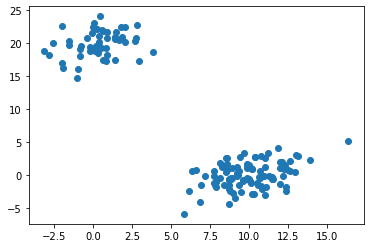

In [9]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,]) # Puntos con normal 10,0 y desviación típica de 3 en horiz 4 en vert
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,]) # Puntos con normal 0,20 y desviación típica de 3 en horiz 4 en vert
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1]);

In [24]:
# Linkage Matrix
Z = linkage(X,'ward',metric='euclidean') # punto1 , punto2 , distancia entre punto 1 y 2 , número de elementos en el cluster
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [22]:
# 98% de conservación de las distancias originales
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

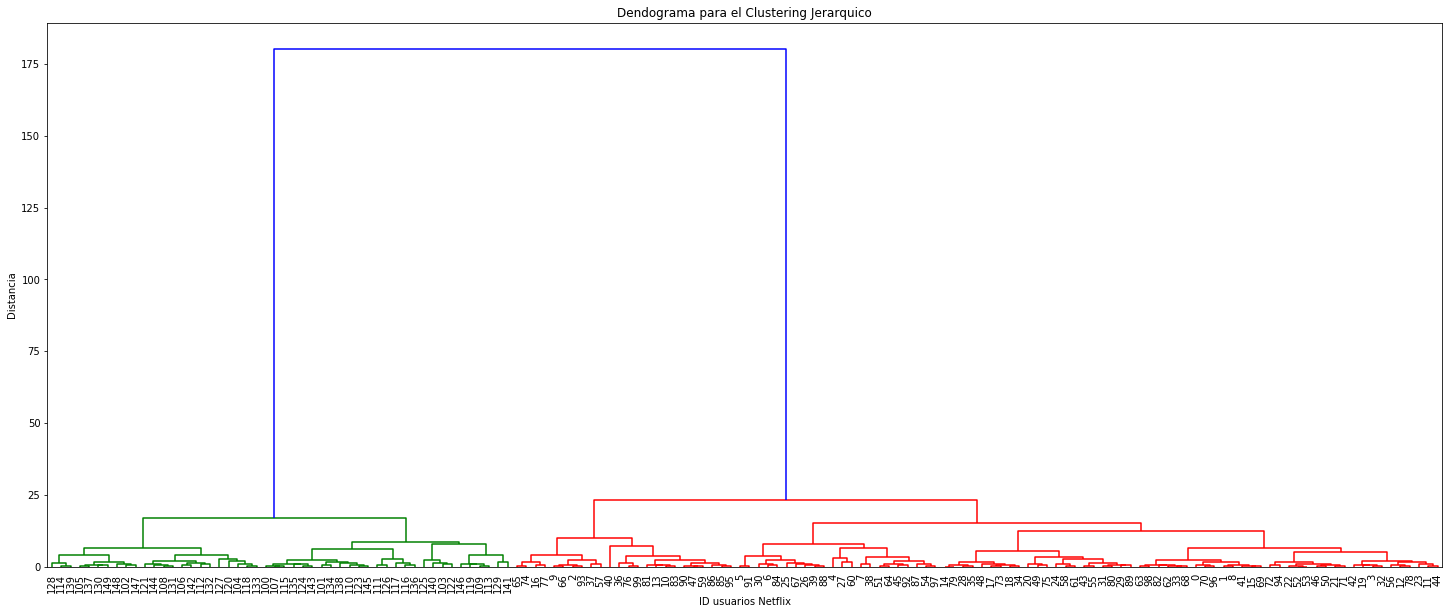

In [23]:
# Plot Dendrogram 
plt.figure(figsize=(25,10))
plt.title('Dendograma para el Clustering Jerarquico')
plt.xlabel('ID usuarios Netflix')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.show();

In [25]:
Z[152-len(X)] # Cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

In [26]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

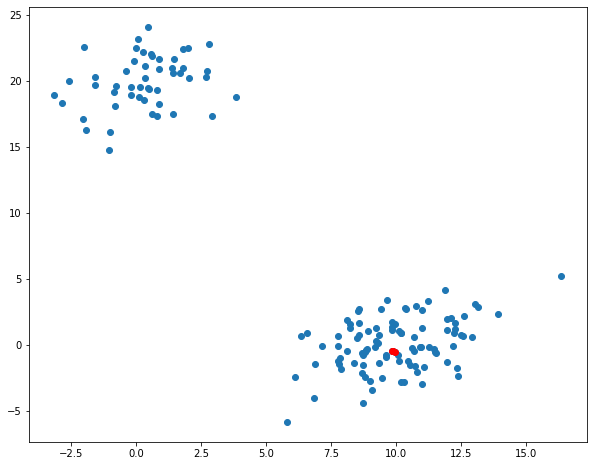

In [28]:
idx=[33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) # Pintar puntos
plt.scatter(X[idx,0],X[idx,1],c='r');